In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

### load the Iris.csv into the notebook

In [2]:
# Load data
df = pd.read_csv('Iris.csv',index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Preprocess data
# check if there are missing values
print(df.isnull().sum(), end='\n\n')

# check if there are non-numerical features
print(df.info())



SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None


In [4]:
# check 'Specious' values
print(df.Species.value_counts())

# LabelEncode its values
df['Species'] = LabelEncoder().fit_transform(df['Species'])


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


_Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2._

### plot six different scatter plots with the different combinations of the variables
For example sepal length vs petal length
In each scatter plot:
- code the different species observations with different colours
- which of these plots look the most promissing for separating into clusters?

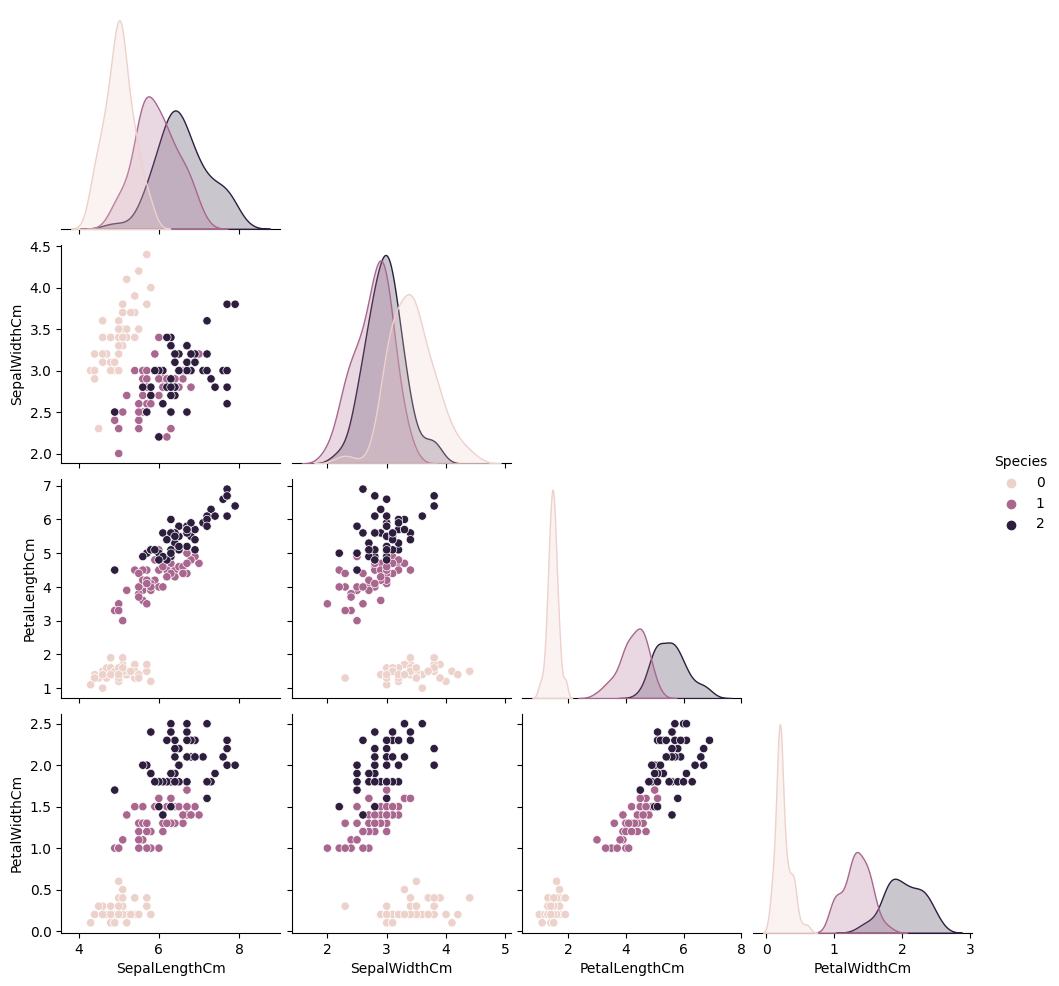

In [5]:
# scater plots with six different combinations of the variables
sns.pairplot(df, hue="Species", corner=True)

### select two of the most promising plots and build a KMean model with k=3 for each of these pairs of features

_From above plots, it seems that the following two are the most promising ones:_
- scater plot _'SepalLengthCm' vs 'PetalLengthCm'
- scater plot _'PetalLengthCm' vs 'PetalWidthCm'


In [6]:
k=3
# for scater plot 'SepalLengthCm' vs 'PetalLengthCm'
# prepare x data for training
t_x = df[['SepalLengthCm', 'PetalLengthCm']].values.reshape(-1,2)
print('Data size: ', t_x.shape)

# build Kmeans model with k=3
s_kmeans = KMeans(n_clusters=k, random_state=120)
s_kmeans.fit(t_x)


Data size:  (150, 2)


c:\Users\Feifei\.conda\envs\Fei-Env-Python10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Feifei\.conda\envs\Fei-Env-Python10\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=120)

In [7]:

# for plot 'PetalLengthCm' vs 'PetalWidthCm'
# prepare x data for training
s_x = df[['PetalLengthCm', 'PetalWidthCm']].values.reshape(-1,2)
print('Data size: ', s_x.shape)

# build Kmeans model with k=3
t_kmeans = KMeans(n_clusters=3, random_state=120)
t_kmeans.fit(t_x)


Data size:  (150, 2)


c:\Users\Feifei\.conda\envs\Fei-Env-Python10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Feifei\.conda\envs\Fei-Env-Python10\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=120)

### For each of these two models:
- create a scatter plot showing the clusters predicted by the model
- what is the accuracy of your model?


In [8]:
# define function for outcome visualisation
def scatter_Kmeans(x, x_label, y_label):
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=123)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    score = round(silhouette_score(x, kmeans.labels_, metric='euclidean'),2)
    plt.title(f'Plot {x_label} vs {y_label}, silhouette={score}', loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()


c:\Users\Feifei\.conda\envs\Fei-Env-Python10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Feifei\.conda\envs\Fei-Env-Python10\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


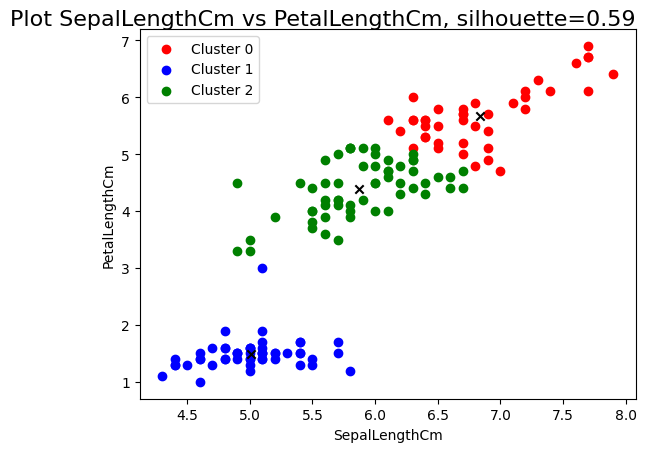

c:\Users\Feifei\.conda\envs\Fei-Env-Python10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Feifei\.conda\envs\Fei-Env-Python10\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


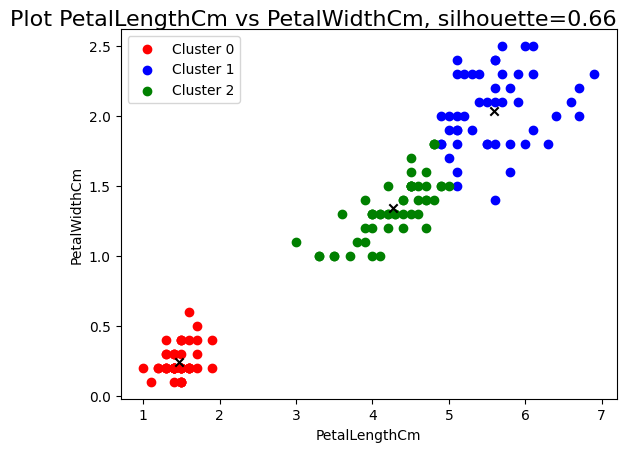

In [9]:
# for scater plot 'SepalLengthCm' vs 'PetalLengthCm'
scatter_Kmeans(t_x, 'SepalLengthCm', 'PetalLengthCm')
# for scater plot 'PetalLengthCm' vs 'PetalWidthCm'
scatter_Kmeans(s_x, 'PetalLengthCm', 'PetalWidthCm')


_From above results, plot 'SepalLengthCm' vs 'PetalLengthCm' has silhouette value of 0.59, while plot 'PetalLengthCm' vs 'PetalWidthCm' has silhouette value of 0.66. Therefore plot PetalLengthCm vs PetalWidthCm will produce a better result._